 ### How do salary averages compare for top ten jobs over time? (2020-2024)
 ### Are there trends with the top ten jobs by count between 2020 and 2024?  (time series,)
 ### Based on trends for top ten jobs, can a prediction be made for job growth beyond 2024? (Prophet model)

In [ ]:
# Import dependencies

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import prophet


In [ ]:
# Read-in cleaned csv

global_data_jobs=pd.read_csv("/Users/geoffmaitland/Documents/aibootcamp/GIT/Global_Data_Jobs/clean.csv")
global_data_jobs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean.csv to clean.csv


# Checks

In [ ]:
# Read-in cleaned csv

global_data_jobs=pd.read_csv("clean.csv")
global_data_jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
1,2024,Entry-level,Full-time,Data Reporting Analyst,58000,USD,58000,United States,In-person,United States,M
2,2024,Entry-level,Full-time,Data Reporting Analyst,42000,USD,42000,United States,In-person,United States,M
3,2024,Senior,Full-time,Data Manager,169680,USD,169680,United States,Remote,United States,M
4,2024,Senior,Full-time,Data Manager,113120,USD,113120,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21297,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L
21298,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
21299,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
21300,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S


In [ ]:
# Check dataframe columns, data types, confirm no null values
global_data_jobs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           21302 non-null  int64 
 1   experience_level    21302 non-null  object
 2   employment_type     21302 non-null  object
 3   job_title           21302 non-null  object
 4   salary              21302 non-null  int64 
 5   salary_currency     21302 non-null  object
 6   salary_in_usd       21302 non-null  int64 
 7   employee_residence  21302 non-null  object
 8   work_setting        21302 non-null  object
 9   company_location    21302 non-null  object
 10  company_size        21302 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
global_data_jobs["work_year"].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2023-01-01 00:00:00', '2022-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00']
Length: 5, dtype: datetime64[ns]

In [ ]:

# Update salary-in_usd to float, work_year to datetime

global_data_jobs['work_year'] = pd.to_datetime(global_data_jobs['work_year'], format='%Y')
global_data_jobs['salary_in_usd']= global_data_jobs['salary_in_usd'].astype(float)
global_data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           21302 non-null  datetime64[ns]
 1   experience_level    21302 non-null  object        
 2   employment_type     21302 non-null  object        
 3   job_title           21302 non-null  object        
 4   salary              21302 non-null  int64         
 5   salary_currency     21302 non-null  object        
 6   salary_in_usd       21302 non-null  float64       
 7   employee_residence  21302 non-null  object        
 8   work_setting        21302 non-null  object        
 9   company_location    21302 non-null  object        
 10  company_size        21302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.8+ MB


In [ ]:
# Filter dataframes by experience level
global_data_jobs_ent = global_data_jobs.loc[global_data_jobs['experience_level'].isin(['Entry-level'])]


# What are the most common jobs in Data Science?
## Top 3 jobs by year

In [ ]:
# Top Three Jobs (by count; all experience levels; all years)

top_three = global_data_jobs['job_title'].value_counts().head(3)
top_three

job_title
Data Scientist    7139
Data Engineer     6686
Data Analyst      4505
Name: count, dtype: int64

In [ ]:
top_three = global_data_jobs.loc[global_data_jobs['job_title'].isin(['Data Scientist', 'Data Analyst', 'Data Engineer'])]
top_three.groupby(['work_year'])
top_three

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024-01-01,Entry-level,Full-time,Data Analyst,20000,USD,20000.0,India,Remote,India,M
5,2024-01-01,Mid-level,Full-time,Data Scientist,235400,USD,235400.0,United States,In-person,United States,M
6,2024-01-01,Mid-level,Full-time,Data Scientist,209720,USD,209720.0,United States,In-person,United States,M
7,2024-01-01,Mid-level,Full-time,Data Scientist,235400,USD,235400.0,United States,Remote,United States,M
8,2024-01-01,Mid-level,Full-time,Data Scientist,209720,USD,209720.0,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21293,2020-01-01,Mid-level,Full-time,Data Engineer,130800,USD,130800.0,Spain,Remote,United States,M
21295,2021-01-01,Mid-level,Full-time,Data Scientist,160000,SGD,119059.0,Singapore,Remote,Israel,M
21296,2021-01-01,Mid-level,Full-time,Data Engineer,24000,EUR,28369.0,Malta,Hybrid,Malta,L
21298,2020-01-01,Senior,Full-time,Data Scientist,412000,USD,412000.0,United States,Remote,United States,L


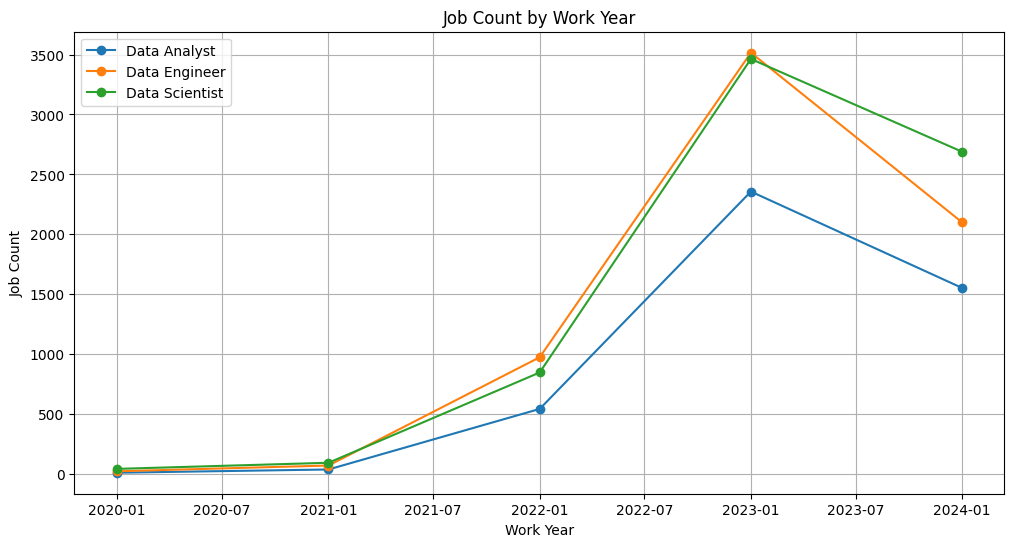

In [ ]:
job_count_by_year = top_three.groupby(['work_year', 'job_title']).size().reset_index(name='job_count')

# Create a line graph
plt.figure(figsize=(12, 6))
for job_title in job_count_by_year['job_title'].unique():
    data = job_count_by_year[job_count_by_year['job_title'] == job_title]
    plt.plot(data['work_year'], data['job_count'], label=job_title, marker='o')

plt.xlabel('Work Year')
plt.ylabel('Job Count')
plt.title('Job Count by Work Year')
plt.legend()
plt.grid(True)
plt.show()

## Top Ten Jobs by Year

In [ ]:
# Top Ten Jobs (by count; all experience levels; all years)
top_ten = global_data_jobs['job_title'].value_counts().head(10)
top_ten

job_title
Data Scientist            7139
Data Engineer             6686
Data Analyst              4505
Data Architect             768
Data Manager               418
Data Specialist            160
Data Analytics Manager     116
Head of Data               104
Data Modeler                94
Data Science Manager        88
Name: count, dtype: int64

In [ ]:
top_ten = global_data_jobs.loc[global_data_jobs['job_title'].isin(['Data Scientist', 'Data Analyst', 'Data Engineer', 'Data Architect', 'Data Manager', 'Data Specialist', 'Data Analytics Manager', 'Head of Data','Data Modeler','Data Science Manager'])]
top_ten.groupby(['work_year'])
top_ten

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024-01-01,Entry-level,Full-time,Data Analyst,20000,USD,20000.0,India,Remote,India,M
3,2024-01-01,Senior,Full-time,Data Manager,169680,USD,169680.0,United States,Remote,United States,M
4,2024-01-01,Senior,Full-time,Data Manager,113120,USD,113120.0,United States,Remote,United States,M
5,2024-01-01,Mid-level,Full-time,Data Scientist,235400,USD,235400.0,United States,In-person,United States,M
6,2024-01-01,Mid-level,Full-time,Data Scientist,209720,USD,209720.0,United States,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21295,2021-01-01,Mid-level,Full-time,Data Scientist,160000,SGD,119059.0,Singapore,Remote,Israel,M
21296,2021-01-01,Mid-level,Full-time,Data Engineer,24000,EUR,28369.0,Malta,Hybrid,Malta,L
21297,2021-01-01,Senior,Full-time,Data Specialist,165000,USD,165000.0,United States,Remote,United States,L
21298,2020-01-01,Senior,Full-time,Data Scientist,412000,USD,412000.0,United States,Remote,United States,L


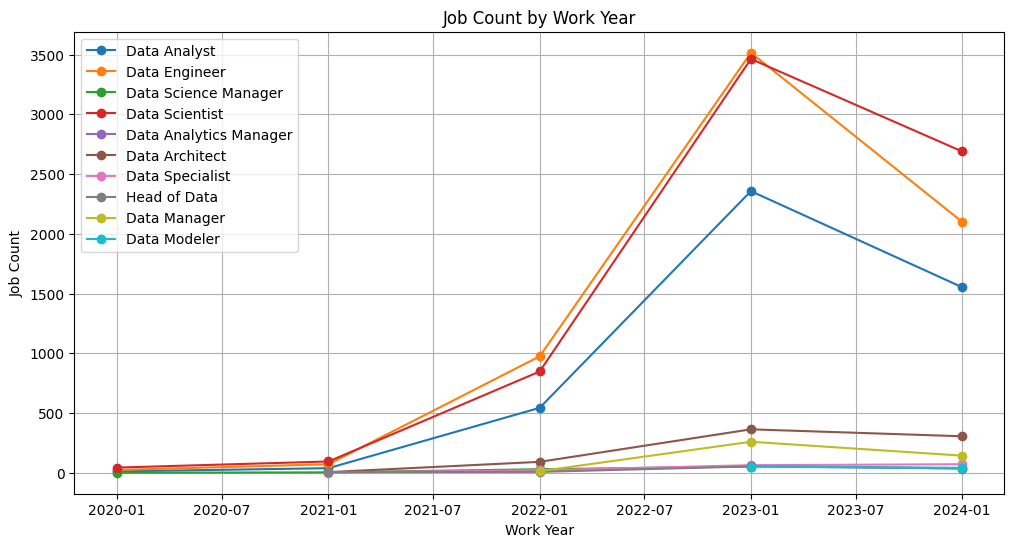

In [ ]:
job_count_by_year_ten = top_ten.groupby(['work_year', 'job_title']).size().reset_index(name='job_count')

# Create a line graph
plt.figure(figsize=(12, 6))
for job_title in job_count_by_year_ten['job_title'].unique():
    data = job_count_by_year_ten[job_count_by_year_ten['job_title'] == job_title]
    plt.plot(data['work_year'], data['job_count'], label=job_title, marker='o')

plt.xlabel('Work Year')
plt.ylabel('Job Count')
plt.title('Job Count by Work Year')
plt.legend()
plt.grid(True)
plt.show()

# What are the salary trends for the most common Data Science jobs?
## Top three  

In [ ]:
average_salary_by_job_year = top_three.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().round(2)
print(average_salary_by_job_year)

work_year   job_title     
2020-01-01  Data Analyst       60911.17
            Data Engineer      89276.50
            Data Scientist    101198.77
2021-01-01  Data Analyst       79831.69
            Data Engineer      98090.60
            Data Scientist     92220.91
2022-01-01  Data Analyst      108658.29
            Data Engineer     139696.54
            Data Scientist    139121.07
2023-01-01  Data Analyst      109807.30
            Data Engineer     150024.61
            Data Scientist    163792.32
2024-01-01  Data Analyst      108309.17
            Data Engineer     149866.98
            Data Scientist    158474.79
Name: salary_in_usd, dtype: float64


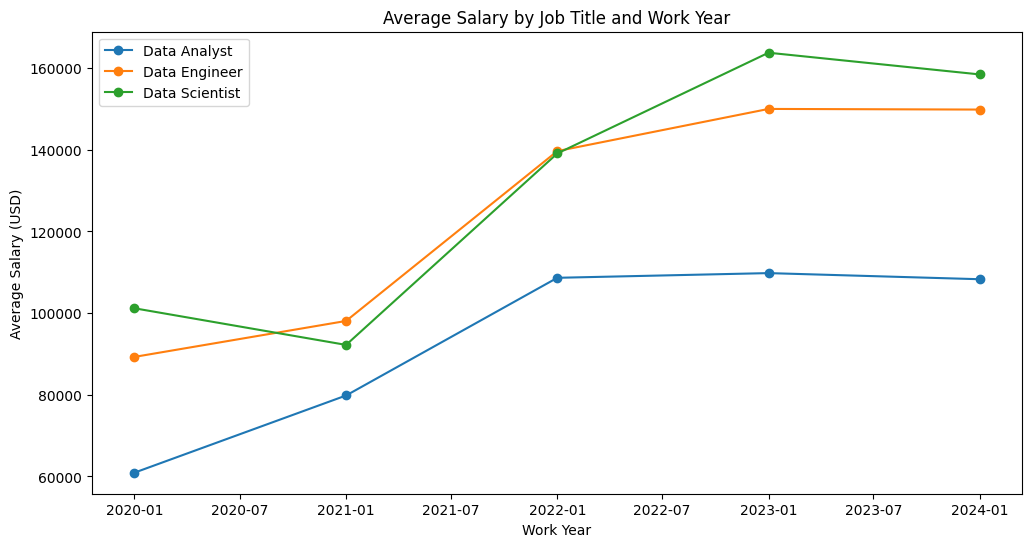

In [ ]:
average_salary_by_job_year = average_salary_by_job_year.reset_index()

# Create a line plot for each job title
fig, ax = plt.subplots(figsize=(12, 6))

for job_title in average_salary_by_job_year['job_title'].unique():
    data = average_salary_by_job_year[average_salary_by_job_year['job_title'] == job_title]
    ax.plot(data['work_year'], data['salary_in_usd'], label=job_title, marker='o')

ax.set_xlabel('Work Year')
ax.set_ylabel('Average Salary (USD)')
ax.set_title('Average Salary by Job Title and Work Year')
ax.legend()
plt.show()

## Top ten  

In [ ]:
average_salary_by_job_year_ten = top_ten.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().round(2)
print(average_salary_by_job_year_ten)

work_year   job_title             
2020-01-01  Data Analyst               60911.17
            Data Engineer              89276.50
            Data Science Manager      190200.00
            Data Scientist            101198.77
2021-01-01  Data Analyst               79831.69
            Data Analytics Manager    126666.67
            Data Architect            166666.67
            Data Engineer              98090.60
            Data Science Manager      177500.00
            Data Scientist             92220.91
            Data Specialist           165000.00
            Head of Data              189279.67
2022-01-01  Data Analyst              108658.29
            Data Analytics Manager    133991.43
            Data Architect            166091.54
            Data Engineer             139696.54
            Data Manager              101839.43
            Data Science Manager      191360.30
            Data Scientist            139121.07
            Data Specialist           118181.82
     

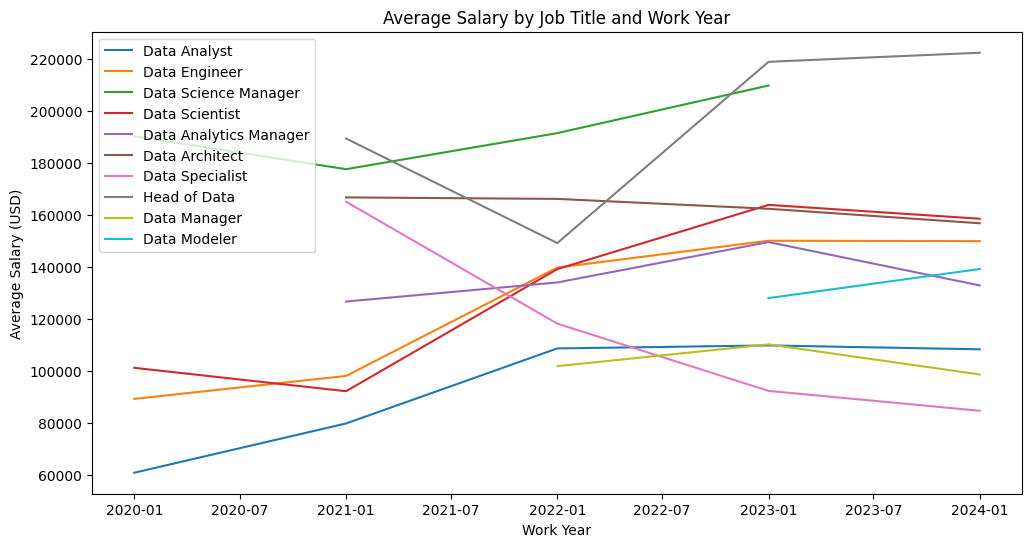

In [ ]:
average_salary_by_job_year_ten = average_salary_by_job_year_ten.reset_index()

# Create a line plot for each job title
fig, ax = plt.subplots(figsize=(12, 6))

for job_title in average_salary_by_job_year_ten['job_title'].unique():
    data = average_salary_by_job_year_ten[average_salary_by_job_year_ten['job_title'] == job_title]
    ax.plot(data['work_year'], data['salary_in_usd'], label=job_title)

ax.set_xlabel('Work Year')
ax.set_ylabel('Average Salary (USD)')
ax.set_title('Average Salary by Job Title and Work Year')
ax.legend()
plt.show()

# What is the outlook for jobs in Data Science?
## Using Prophet to make predictions past 2024

In [ ]:

data_scientist = global_data_jobs.loc[global_data_jobs['job_title'].isin(['Data Scientist'])]
data_scientist.groupby(['work_year'])

data_scientist_prophet = data_scientist.drop(columns=['experience_level','employment_type','job_title','salary', 'salary_currency', 'employee_residence', 'work_setting', 'company_location', 'company_size' ])
# data_scientist_prophet = data_scientist.rename(columns={'work_year':'ds', 'salary_in_usd':'y'})
# data_scientist_prophet.head()
data_scientist_prophet=data_scientist_prophet.rename(columns={'work_year':'ds', 'salary_in_usd':'y'})
data_scientist_prophet

,ds,y
5,2024-01-01,235400.0
6,2024-01-01,209720.0
7,2024-01-01,235400.0
8,2024-01-01,209720.0
9,2024-01-01,279400.0
...,...,...
21291,2020-01-01,118000.0
21292,2020-01-01,138350.0
21295,2021-01-01,119059.0
21298,2020-01-01,412000.0


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()
model

In [ ]:
model.fit(data_scientist_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0gzb0tq/youu_itr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0gzb0tq/fmafdapm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=695', 'data', 'file=/tmp/tmpa0gzb0tq/youu_itr.json', 'init=/tmp/tmpa0gzb0tq/fmafdapm.json', 'output', 'file=/tmp/tmpa0gzb0tq/prophet_modelobsvdavb/prophet_model-20240707222802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:28:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:28:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
jobs_future=model.make_future_dataframe(periods=4,freq='Y')


jobs_future

,ds
0,2020-01-01
1,2021-01-01
2,2022-01-01
3,2023-01-01
4,2024-01-01
5,2024-12-31
6,2025-12-31
7,2026-12-31
8,2027-12-31


In [ ]:
jobs_forcast=model.predict(jobs_future).round(2)
jobs_forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,102235.50,13591.45,186573.99,102235.50,102235.50,-849.91,-849.91,-849.91,-849.91,-849.91,-849.91,0.0,0.0,0.0,101385.59
1,2021-01-01,132829.76,18000.67,176611.10,132829.76,132829.76,-36468.32,-36468.32,-36468.32,-36468.32,-36468.32,-36468.32,0.0,0.0,0.0,96361.44
2,2022-01-01,163340.42,56291.37,216208.35,163340.42,163340.42,-24606.80,-24606.80,-24606.80,-24606.80,-24606.80,-24606.80,0.0,0.0,0.0,138733.62
3,2023-01-01,176383.77,85608.94,245702.73,176383.77,176383.77,-12729.18,-12729.18,-12729.18,-12729.18,-12729.18,-12729.18,0.0,0.0,0.0,163654.59
4,2024-01-01,159477.36,83638.25,231728.94,159477.36,159477.36,-849.91,-849.91,-849.91,-849.91,-849.91,-849.91,0.0,0.0,0.0,158627.45
5,2024-12-31,142570.95,79415.47,230439.58,141010.34,144022.09,11016.57,11016.57,11016.57,11016.57,11016.57,11016.57,0.0,0.0,0.0,153587.52
6,2025-12-31,125664.53,71069.40,232061.10,120932.05,130177.71,22855.83,22855.83,22855.83,22855.83,22855.83,22855.83,0.0,0.0,0.0,148520.36
7,2026-12-31,108758.12,63942.06,220612.79,99253.17,117443.76,34653.48,34653.48,34653.48,34653.48,34653.48,34653.48,0.0,0.0,0.0,143411.60
8,2027-12-31,91851.70,59634.96,220523.00,76611.25,106161.31,46395.21,46395.21,46395.21,46395.21,46395.21,46395.21,0.0,0.0,0.0,138246.91


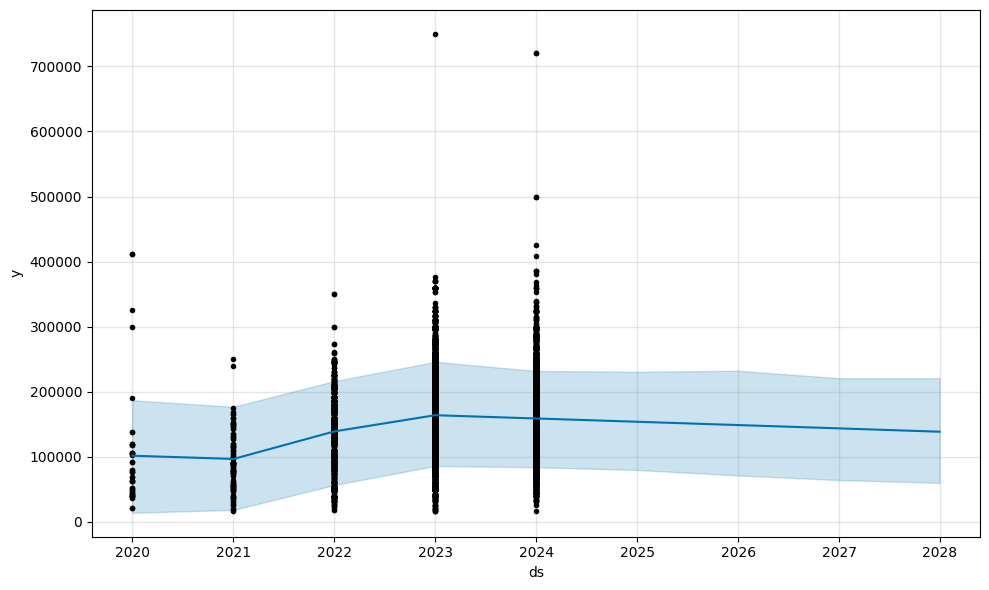

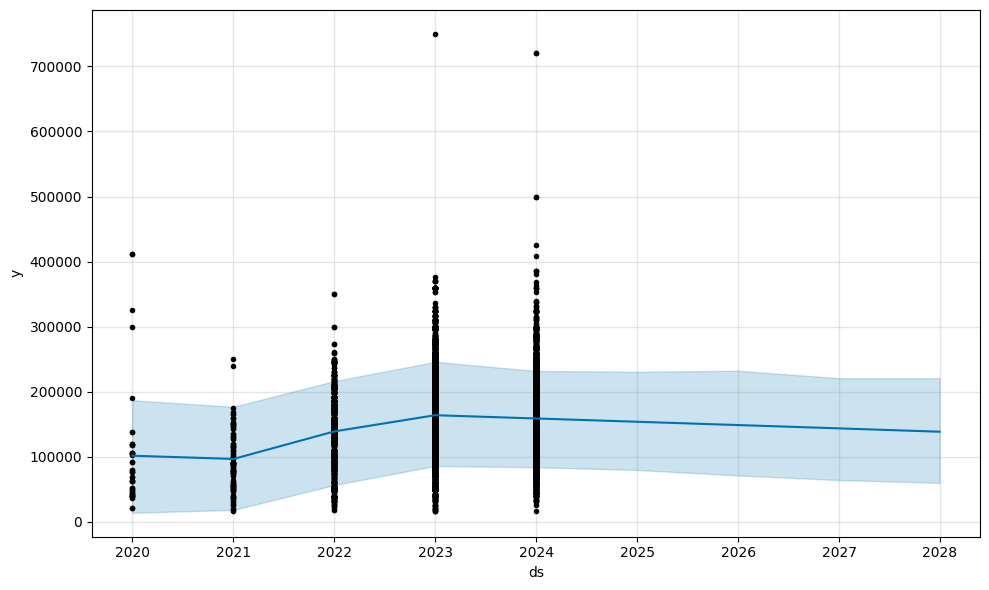

In [ ]:
model.plot(jobs_forcast)